In [1]:
from pathlib import Path
import shutil
import pandas as pd
import matplotlib.pyplot as plt

from frequency_analysis.logging import create_logger
from frequency_analysis.data_io import read_yearly_maxima
from frequency_analysis.plotting import plot_yearly_data

In [2]:
# Read and validate input data

# data = read_data("../data/39001_thames_missing.csv", "%d/%m/%Y")
path_data = "../data/84111_SantaLucia.csv"
data = read_yearly_maxima(path=path_data, date_format="%Y")
data.tail()


Year
2013     87.0
2014    137.6
2015     94.2
2016    102.5
2017    134.2
Name: PMax_24, dtype: float64

In [3]:
# Start report and log
name = path_data.split("/")[-1][:-4]
output_path = Path("../reports") / name
try:
    shutil.rmtree(output_path)
except OSError:
    print("Starting new analysis!")
Path.mkdir(output_path, exist_ok=True)

logger = create_logger(output_path / f"{name}.log")
logger.info(f"Started analysis of {name}")

2024-03-17 20:35:53 - Started analysis of 84111_SantaLucia


In [4]:
# Input data
logger.info("Input data:\n" + data.to_string(header=False))
logger.info("End of input data")

2024-03-17 20:35:53 - Input data:
1981     75.1
1982    102.0
1983     80.5
1984     85.9
1985     96.8
1986     98.9
1987     85.5
1988     99.1
1989     92.5
1990    113.7
1991     83.1
1992     96.1
1993    108.5
1994     85.5
1995    119.6
1996     86.2
1997    120.8
1998     91.2
1999     87.9
2000    120.5
2001    111.4
2002     84.9
2003     63.0
2004    185.4
2005     90.0
2006    107.2
2007    129.0
2008    118.1
2009     84.3
2010    101.0
2011    107.2
2012    100.3
2013     87.0
2014    137.6
2015     94.2
2016    102.5
2017    134.2
2024-03-17 20:35:53 - End of input data


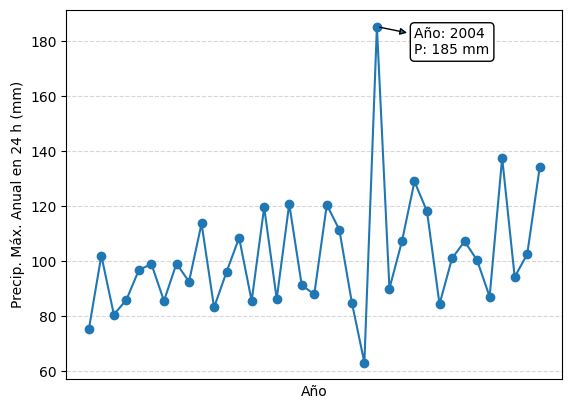

In [5]:
# Plot
fig, ax = plot_yearly_data(data=data, label_delta_x=3, label_delta_y=-10, plot_delta_x=5, discharge=False)
plt.savefig(output_path / Path("ts-plot.png"), dpi=300)
plt.show()